In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
base_dir = Path('/media/external/tcc_work')
base_dir.cwd()

PosixPath('/media/external/tcc_work/code')

In [3]:
csv_path = base_dir / 'pvd_features_label.csv'
df_data = pd.read_csv(csv_path, names=['filename', 'average distance', 'l2 distance', 'structure content', 'image fidelity', 'n cross correlation', 'nmse', 'psnr', 'label'])
print(df_data.shape)
del df_data['filename']
df_data

(5150, 9)


,average distance,l2 distance,structure content,image fidelity,n cross correlation,nmse,psnr,label
0,110.410233,1.117600,0.996417,0.766773,1.154550,0.234066,32.781810,1
1,123.259460,1.163086,0.999271,0.404280,1.214802,0.596155,27.763978,1
2,115.180588,1.140162,0.997557,0.742499,1.136962,0.258132,32.549924,1
3,123.414215,1.160832,1.009542,0.411698,1.140562,0.582742,26.913501,1
4,105.879456,1.101438,1.000132,0.905325,1.142592,0.094663,38.023199,0
...,...,...,...,...,...,...,...,...
5145,111.843562,1.128775,1.002169,0.842222,1.153222,0.157437,34.937279,0
5146,122.946309,1.160643,1.003628,0.400202,1.175039,0.597630,27.500731,0
5147,116.780177,1.147466,1.005007,0.724389,1.149457,0.274238,32.392978,1
5148,117.639303,1.138356,1.010167,0.545478,1.092188,0.449948,27.500400,1


In [4]:
arr = df_data.to_numpy()
X = arr[:, :7]
y = arr[:, 7]

print(X)

[[110.41023254   1.11759958   0.99641671 ...   1.15455032   0.23406618
   32.78181028]
 [123.25946045   1.16308626   0.99927118 ...   1.21480224   0.59615485
   27.76397837]
 [115.18058777   1.14016176   0.99755656 ...   1.13696171   0.25813192
   32.54992359]
 ...
 [116.7801768    1.14746643   1.00500653 ...   1.14945694   0.27423766
   32.39297802]
 [117.63930257   1.13835628   1.01016733 ...   1.09218828   0.44994771
   27.5004004 ]
 [117.49726868   1.15007149   1.01578312 ...   1.1457335    0.29545966
   31.06476043]]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train.dtype)
#print(y_train.dtype)
#clf = svm.SVC()
clf = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', gamma='scale'))
#clf = make_pipeline(StandardScaler(), SVC())
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.5941747572815534


Confusion Matrix
[[432 345]
 [282 486]]
Test Set: 1545
Accuracy = 59.417475728155345 %


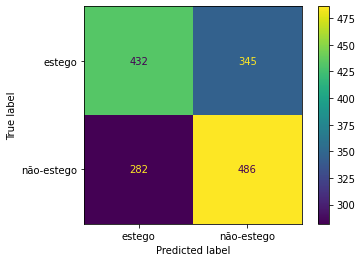

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predictions = clf.predict(X_test)
res = confusion_matrix(y_test, predictions)
percentage = clf.score(X_test, y_test)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=["estego", "não-estego"])